<a href="https://colab.research.google.com/github/fepegar/resseg/blob/master/RESSEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q resseg antspyx

In [2]:
%%bash
BITE=`resseg-download bite`
echo $BITE
resseg $BITE -o bite_seg.nii.gz

04_postop_mri_bite_u8.nii.gz


Using cache found in /root/.cache/torch/hub/fepegar_resseg_master
100%|██████████| 1/1 [00:09<00:00,  9.89s/it]


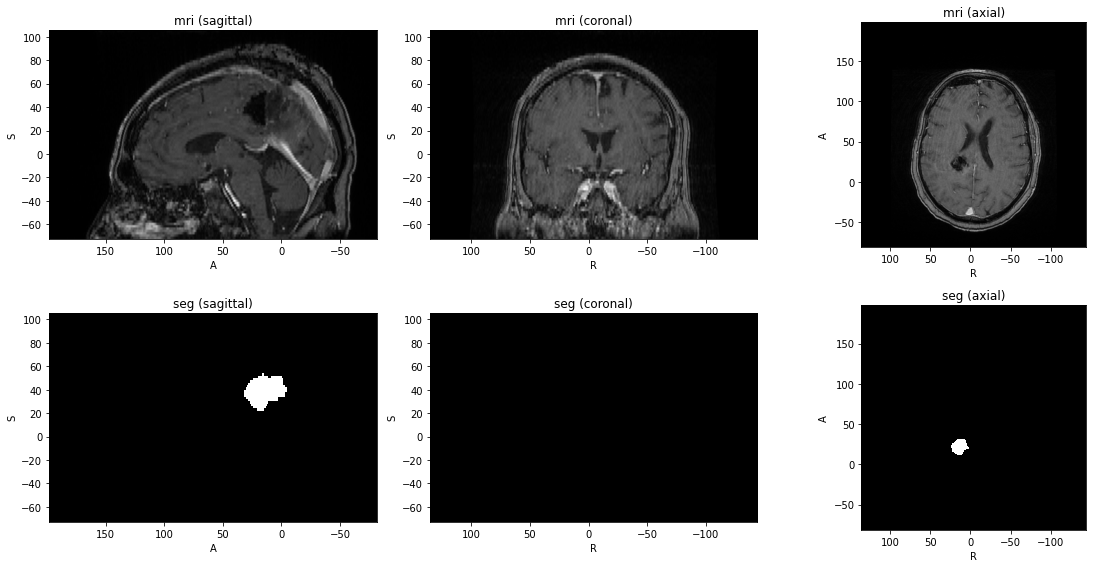

In [3]:
import torchio as tio
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
subject = tio.Subject(
    mri=tio.ScalarImage('04_postop_mri_bite_u8.nii.gz'),
    seg=tio.LabelMap('bite_seg.nii.gz'),
)
subject.plot()

In [4]:
%%bash
EPISURG=`resseg-download episurg`
echo $EPISURG
resseg-mni $EPISURG -t episurg_to_mni.tfm
resseg $EPISURG -o episurg_seg.nii.gz -t episurg_to_mni.tfm

sub-0089_postop-t1mri-1_u8.nii.gz


2021-03-17 10:07:28.401410: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using cache found in /root/.cache/torch/hub/fepegar_resseg_master
100%|██████████| 1/1 [00:04<00:00,  4.51s/it]


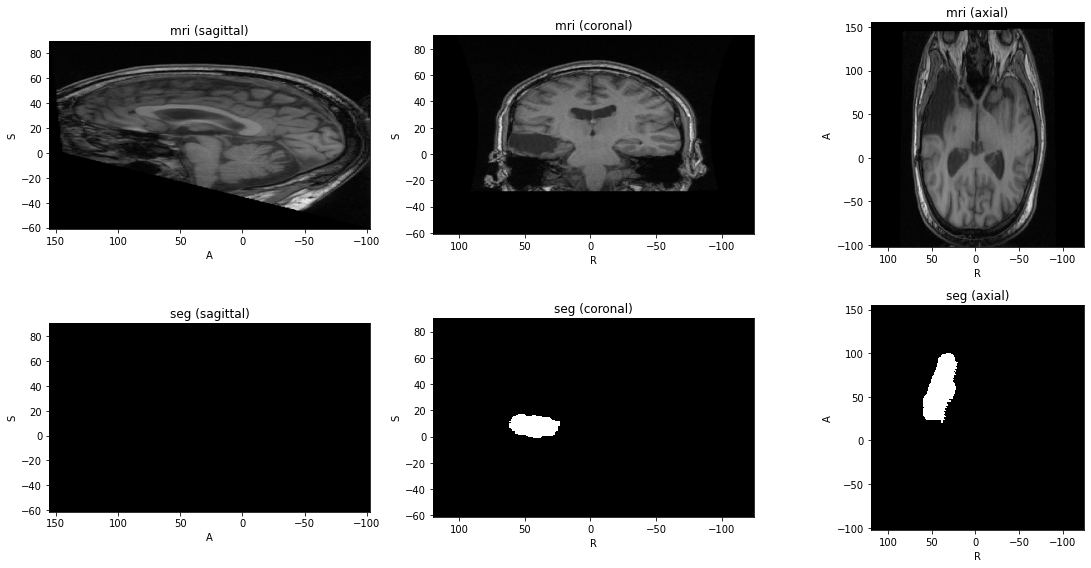

In [5]:
subject = tio.Subject(
    mri=tio.ScalarImage('sub-0089_postop-t1mri-1_u8.nii.gz'),
    seg=tio.LabelMap('episurg_seg.nii.gz'),
)
subject.plot()